In [1]:
import numpy as np
import pandas as pd

In [130]:
train_df=pd.read_csv("./data/train.csv")
test_df=pd.read_csv("./data/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.set_index('PassengerId',inplace=True)
test_df.set_index('PassengerId',inplace=True)

In [132]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Feature Classification

In [7]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    f

In [8]:
f=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
def convert_cat(df,features):
    for f in features:
        df[f]=df[f].astype("category")
convert_cat(train_df,f)
ff=["Pclass","Sex","SibSp","Parch","Embarked"]
convert_cat(test_df,ff)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [10]:
train_df.describe()


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Distibution of Categorical features

In [12]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## Exploratory Data Analysis(EDA)
  ### Correlating categorical features

In [14]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


#### 'Sex'

In [16]:
train_df["Sex"].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

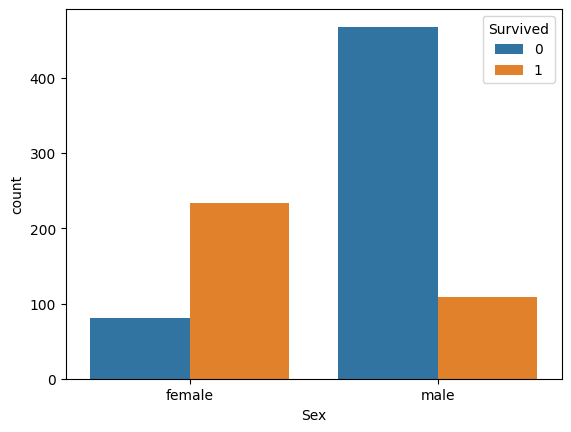

In [18]:
sns.countplot(data=train_df,x='Sex',hue='Survived')

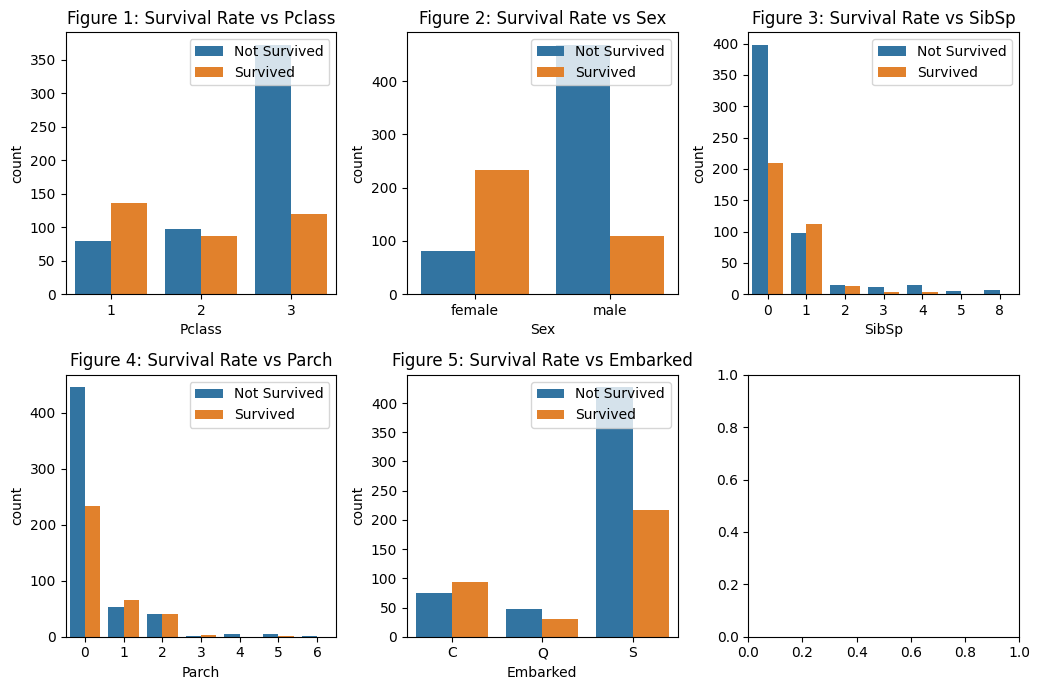

In [19]:
cols=["Pclass","Sex","SibSp","Parch","Embarked"]
n_rows=2
n_cols=3

fig, ax=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c
        if i<len(cols):
            ax_i=ax[r,c]
            sns.countplot(data=train_df,x=cols[i],hue="Survived",ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}")
            ax_i.legend(title='',loc="upper right", labels=['Not Survived','Survived'])
plt.tight_layout()
plt.show()
            


### Survival rate
#### 1. 1st Class higher survival rate 
#### 2. Female > Male
#### 3. go with 0 sibsp mostly not survived, th no. of passenger go with 1-2 cousins has a better chance of survival
#### 4. go with 0 parch mostly not survived
#### 5 Most people embarked on southampton an d had the highest not survived rate

### EDA for Numerical Features

<Axes: xlabel='Age', ylabel='Count'>

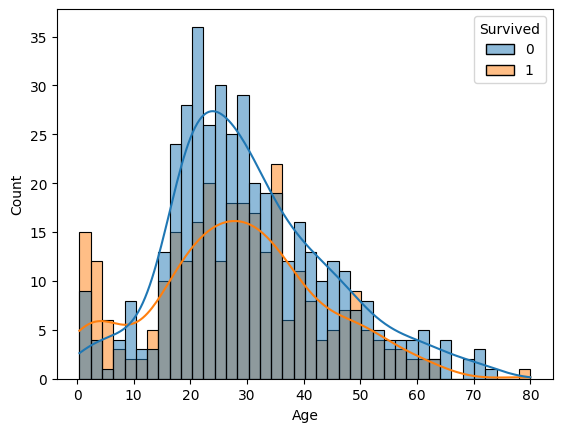

In [22]:
sns.histplot(data=train_df,x='Age',hue='Survived',bins=40,kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

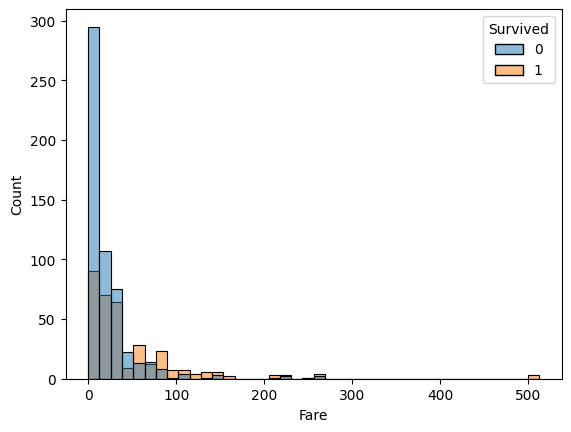

In [23]:
sns.histplot(data=train_df,x='Fare',hue='Survived',bins=40)

<Axes: xlabel='Fare', ylabel='count'>

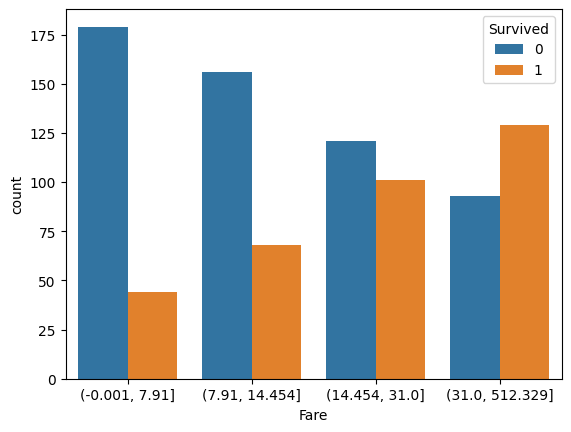

In [24]:
quartile_data=pd.qcut(train_df['Fare'],4)
sns.countplot(x=quartile_data, hue=train_df['Survived'])

## Feature Engineering & Data Wrangling

In [26]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [27]:
import re
def extract_title(name):
    f=re.compile(r", (\w*).")
    return f .search(name).groups(1)[0].strip()

train_df['Title']=train_df['Name'].apply(lambda name: extract_title(name))


In [28]:
test_df['Title']=test_df['Name'].apply(lambda name: extract_title(name))

In [29]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

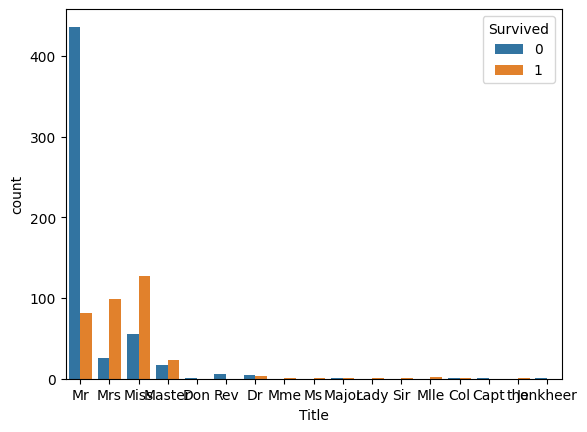

In [30]:
sns.countplot(data=train_df,x='Title',hue='Survived')

In [31]:
train_df['Title']=train_df['Title'].apply(lambda t: t if t in ['Mr','Mrs','Miss','Master'] else 'Others')
test_df['Title']=test_df['Title'].apply(lambda t: t if t in ['Mr','Mrs','Miss','Master'] else 'Others')

In [32]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

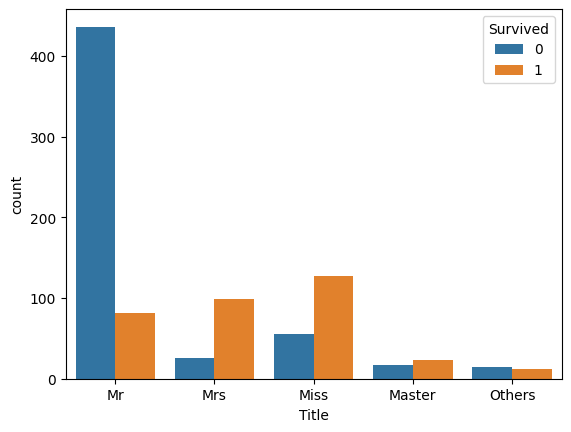

In [33]:
sns.countplot(data=train_df,x='Title',hue='Survived')

## Family

In [35]:
train_df['Family_Size']=train_df['SibSp'].astype('int')+train_df['Parch'].astype('int')+1
test_df['Family_Size']=test_df['SibSp'].astype('int')+test_df['Parch'].astype('int')+1

<Axes: xlabel='Family_Size', ylabel='count'>

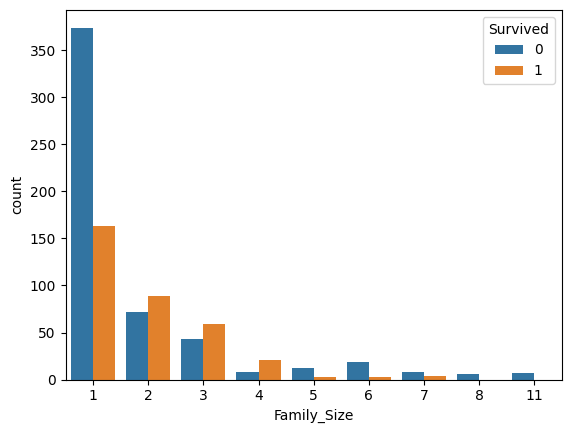

In [36]:
sns.countplot(data=train_df,x='Family_Size',hue='Survived')

In [37]:
train_df['Family_Size']=pd.cut(train_df['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

In [38]:
test_df['Family_Size']=pd.cut(test_df['Family_Size'],bins=[0,1,4,6,20],labels=['Solo','Small','Medium','Large'])

<Axes: xlabel='Family_Size', ylabel='count'>

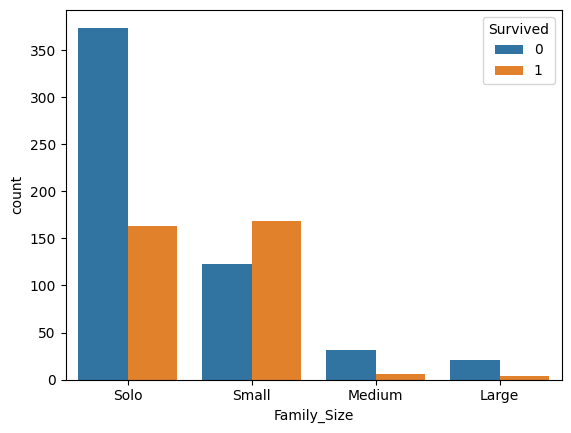

In [39]:
sns.countplot(data=train_df,x='Family_Size',hue='Survived')

## Data Wrangling

In [41]:
num_features=['Age','Fare']
cat_features=['Sex','Pclass','Embarked','Title','Family_Size']
features_col=num_features+cat_features

In [42]:
train_df[features_col].info()
test_df[features_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          714 non-null    float64 
 1   Fare         891 non-null    float64 
 2   Sex          891 non-null    category
 3   Pclass       891 non-null    category
 4   Embarked     889 non-null    category
 5   Title        891 non-null    object  
 6   Family_Size  891 non-null    category
dtypes: category(4), float64(2), object(1)
memory usage: 31.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          332 non-null    float64 
 1   Fare         417 non-null    float64 
 2   Sex          418 non-null    category
 3   Pclass       418 non-null    category
 4   Embarked     418 non-null    category
 5   Title        418 non-null    object  
 6

### Filling missing values
#### Age

In [44]:
age_by_sex_pclass=train_df.groupby(['Sex','Pclass'])['Age'].median()

C:\Users\My PC\AppData\Local\Temp\ipykernel_1816\2422313234.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass=train_df.groupby(['Sex','Pclass'])['Age'].median()


In [45]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [46]:
r=train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
train_df['Age']=r

C:\Users\My PC\AppData\Local\Temp\ipykernel_1816\2360827014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r=train_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [47]:
r=test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age']=r

C:\Users\My PC\AppData\Local\Temp\ipykernel_1816\2935950467.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r=test_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [48]:
train_df['Age'].info()
test_df['Age'].info()

<class 'pandas.core.series.Series'>
Index: 891 entries, 1 to 891
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB
<class 'pandas.core.series.Series'>
Index: 418 entries, 892 to 1309
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
418 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


In [49]:
X=train_df[features_col]
Y=train_df['Survived']

In [50]:
X_test=test_df[features_col]

In [51]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [52]:
num_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
     ('scaler',StandardScaler())                            
])
cat_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
     ('encoder',OneHotEncoder(handle_unknown='ignore'))] )

In [53]:
preprocessor= ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

In [54]:
X=preprocessor.fit_transform(X)

In [55]:
X_test=preprocessor.transform(X_test)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2)

### LogisticRegression

In [58]:
#binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,classification_report,confusion_matrix

In [59]:
log_reg=LogisticRegression(solver='liblinear',max_iter=1000)
log_reg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [60]:
log_reg.score(X_val,Y_val)

0.7821229050279329

In [136]:
predictions1=log_reg.predict(X_test)

In [138]:
output= pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions1})

In [188]:
output.to_csv('submissions/submission.csv', index=False)

### DecisionTree

In [64]:
decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=2024)
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2024)

In [142]:
predictions2=decision_tree.predict(X_test)

In [144]:
output1= pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions2})

In [190]:
output1.to_csv('submissions/submission1.csv', index=False)

### Linear SVC,SVC

In [153]:
from sklearn.svm import LinearSVC, SVC

In [178]:
#linearsvc=LinearSVC(max_iter=1200,random_state=2024)
svc=SVC(random_state=2024)

In [170]:
linearsvc.fit(X_train,Y_train)


LinearSVC(max_iter=1200, random_state=2024)

In [180]:
svc.fit(X_train,Y_train)

SVC(random_state=2024)

In [172]:
predictions3=linearsvc.predict(X_test)

In [182]:
predictions4=svc.predict(X_test)

In [174]:
output2= pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions3})

In [184]:
output3= pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions4})

In [192]:
output2.to_csv('submissions/submission2.csv', index=False)

In [194]:
output3.to_csv('submissions/submission3.csv', index=False)